In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3


Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [33]:
data_paris = pd.read_csv("C:/Users/17789/Python-Project/data_paris.csv")
data_yelp = pd.read_csv("C:/Users/17789/Python-Project/yelp_results.csv", encoding='latin-1')
data_foursquare = pd.read_csv("C:/Users/17789/Python-Project/foursquare_results.csv", encoding='latin-1')

# Merge data_paris, data_yelp
merged_paris_yelp_data = pd.merge(data_paris, data_yelp, how="outer")
# Merge data_paris, data_foursquare
merged_paris_foursquare_data = pd.merge(data_paris, data_foursquare, how="left")

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

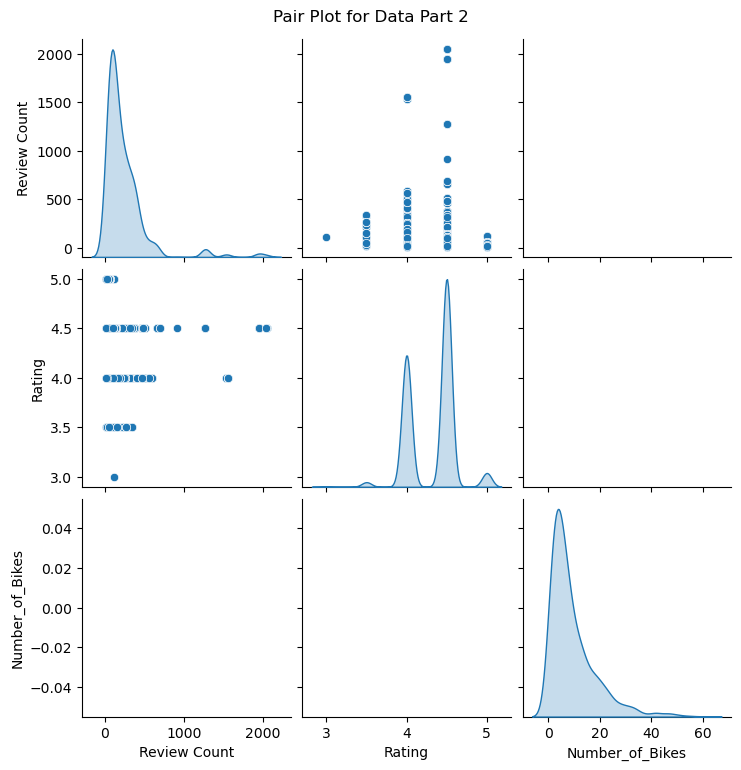

In [22]:
sns.pairplot(merged_paris_yelp_data[['Review Count', 'Rating', 'Number_of_Bikes']], diag_kind='kde')
plt.suptitle('Pair Plot for Data Part 2', y=1.02)
plt.show()


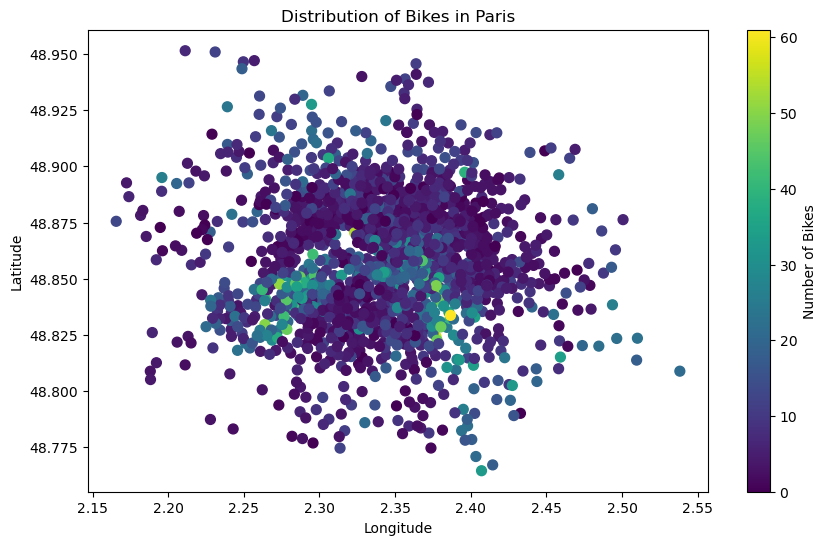

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_paris_foursquare_data['Longitude'], merged_paris_foursquare_data['Latitude'], c=merged_paris_foursquare_data['Number_of_Bikes'], cmap='viridis', s=50)
plt.colorbar(label='Number of Bikes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Bikes in Paris')
plt.show()

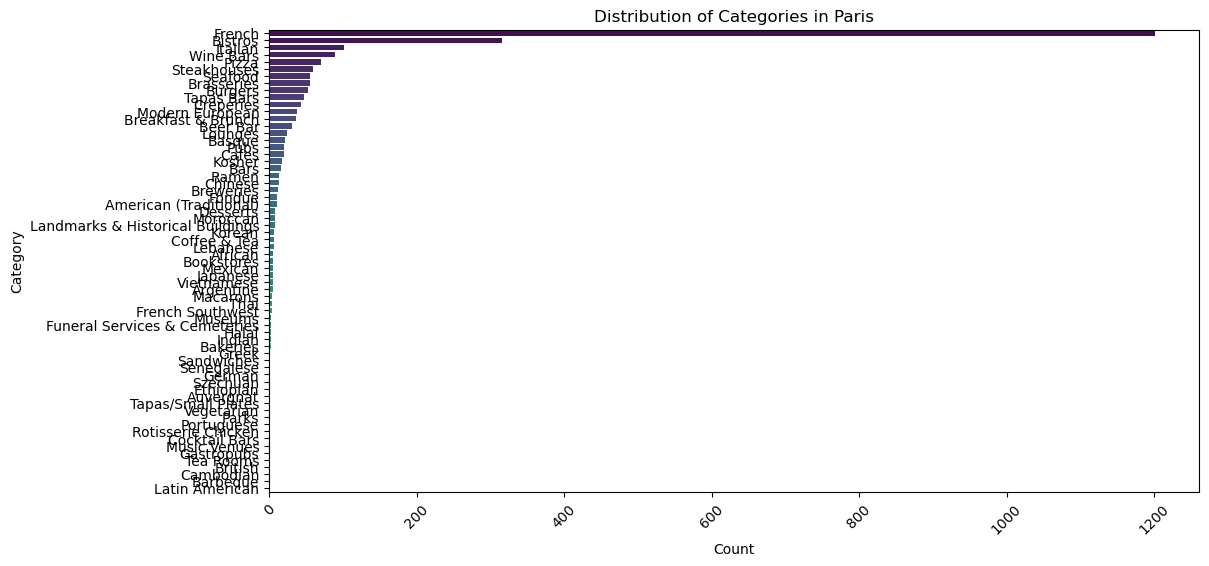

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_paris_yelp_data, y='Category', order=merged_paris_yelp_data['Category'].value_counts().index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Distribution of Categories in Paris')
plt.xticks(rotation=45)
plt.show()


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [41]:
# Connect to the SQLite database
connection = sqlite3.connect("../data/mydatabase.sqlite")
cursor = connection.cursor()

# Create the table for ParisBikes
cursor.execute("CREATE TABLE IF NOT EXISTS ParisBikes (Latitude REAL, Longitude REAL, Bikes INTEGER)")

# Create the table for FourSquare
cursor.execute("CREATE TABLE IF NOT EXISTS FourSquare (Name TEXT, Latitude REAL, Longitude REAL, Category TEXT)")

# Create the table for Yelp
cursor.execute("CREATE TABLE IF NOT EXISTS Yelp (Name TEXT, Latitude REAL, Longitude REAL, ReviewCount INTEGER, Rating REAL, Category TEXT)")

# Create the table for cross join on ParisBikes and FourSquare
cursor.execute("CREATE TABLE IF NOT EXISTS ParisBikesFourSquare (Latitude REAL, Longitude REAL, Bikes INTEGER, Name TEXT, Category TEXT)")

# Create the table for cross join on ParisBikes and Yelp
cursor.execute("CREATE TABLE IF NOT EXISTS ParisBikesYelp (Latitude REAL, Longitude REAL, Bikes INTEGER, Name TEXT, ReviewCount INTEGER, Rating REAL, Category TEXT)")

data_paris.to_sql("ParisBikes", connection, if_exists="replace", index=False)
data_foursquare.to_sql("FourSquare", connection, if_exists="replace", index=False)
data_yelp.to_sql("Yelp", connection, if_exists="replace", index=False)
merged_paris_foursquare_data.to_sql("ParisBikesFourSquare", connection, if_exists="replace", index=False)
merged_paris_yelp_data.to_sql("ParisBikesYelp", connection, if_exists="replace", index=False)

connection.commit()


Look at the data before and after the join to validate your data.

In [42]:
#Query the first few rows from the database to validate
cursor.execute("SELECT * FROM ParisBikes LIMIT 5;")
rows = cursor.fetchall()
for row in rows:
    print(row)

cursor.execute("SELECT * FROM FourSquare LIMIT 5;")
rows = cursor.fetchall()
for row in rows:
    print(row)

cursor.execute("SELECT * FROM Yelp LIMIT 5;")
rows = cursor.fetchall()
for row in rows:
    print(row)

cursor.execute("SELECT * FROM ParisBikesFourSquare LIMIT 10;")
rows = cursor.fetchall()
for row in rows:
    print(row)

cursor.execute("SELECT * FROM ParisBikesYelp LIMIT 10;")
rows = cursor.fetchall()
for row in rows:
    print(row)

# Close the database connection
connection.close()


(48.865983, 2.275725, 1)
(48.85375581057431, 2.3390958085656166, 27)
(48.867872484749, 2.3648982158072, 9)
(48.856451985395786, 2.334851883351803, 1)
(48.87929591733507, 2.3373600840568547, 3)
('Café Lamartine', 48.86594, 2.276189, 'Bar')
('Café Harcourt', 48.867403, 2.275955, 'Restaurant')
('Café de la Mairie', 48.863697, 2.277327, 'Bar')
('120 Cafe', 48.866812, 2.280159, 'American Restaurant')
('Jpl Cafe Coton', 48.866953, 2.280933, 'Clothing Store')
('La Coïncidence', 48.868105, 2.284365, 511, 4.5, 'French')
('Le Comptoir de la Gastronomie', 48.8645157999652, 2.34540185646608, 1272, 4.5, 'French')
('Le Poincaré', 48.8650573, 2.2865211, 150, 4.0, 'French')
('Le Cinq', 48.8688, 2.30083, 158, 4.5, 'French')
('La Fontaine de Mars', 48.858394, 2.302568, 332, 4.5, 'French')
(48.865983, 2.275725, 1, None, None)
(48.85375581057431, 2.3390958085656166, 27, None, None)
(48.867872484749, 2.3648982158072, 9, None, None)
(48.856451985395786, 2.334851883351803, 1, None, None)
(48.87929591733507, 